## Principle Component Analysis

By Rama Vempati

To connect with or follow me on LinkedIn [Click Here](https://www.linkedin.com/in/ramavempati/)

### What is Principle Component Analysis?

Principle Component Analysis also known as PCA is one of the most broadly used unsupervised algorithms. 

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization,
for noise filtering, for feature extraction and engineering, and much more.

### Feature Selection Vs Feature Extraction

Both feature selection and feature extraction are used for dimensionality reduction which is key to reducing model complexity and overfitting.

The key difference between feature selection and feature extraction techniques used for dimensionality reduction is that while the original features are maintained in the case of feature selection algorithms, the feature extraction algorithms transform the data onto a new feature space.

Principal component analysis is often the first thing to try out if you want to cut down the number of features and do not know what feature extraction method to use.

### Let us learn some terminology

### Principle Components:

Principal Components are the underlying structure in the data. They are the directions where there is the most variance, the directions where the data is most spread out. This means that we try to find the straight line that best spreads the data out when it is projected along it. This is the first principal component, the straight line that shows the most substantial variance in the data. Subsequent principle components are orthgonal to eachother and explain the lesser variance than that of former one.

![](pca_01.png)

### Eigen Values and Eigen Vectors

An eigenvector is a direction, such as "vertical" or "45 degrees", while an eigenvalue is a number telling you how much variance there is in the data in that direction. The eigenvector with the highest eigenvalue is, therefore, the first principal component.

### How does PCA work?

PCA helps us to identify patterns in data based on the correlation between features. PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer
dimensions than the original one. 

The orthogonal axes (principal components) of the new subspace can be interpreted as the directions of maximum variance given the constraint that the new feature axes are orthogonal to each other.

we can distinguish between feature extraction methods as being linear or non-linear ones. 

* Principal Component Analysis (PCA) for unsupervised data compression
* Linear Discriminant Analysis (LDA) as a supervised dimensionality reduction technique for maximizing class separability
* Nonlinear dimensionality reduction via Kernel Principal Component Analysis (KPCA)

We will only focus on linear method for this session that is principal component analysis.

Summarizing it, given the original feature space, PCA finds a linear projection of it into a lower dimensional space that has the following properties:

* The conserved variance is maximized
* The final reconstruction error (when trying to go back from transformed features to original ones) is minimized

### Steps in algorithm

1. Standardize the d-dimensional dataset.


2. Construct the covariance matrix.


3. Decompose the covariance matrix into its eigenvectors and eigenvalues.


4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.


5. Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k less than or equal to d).


6. Construct a projection matrix W from the "top" k eigenvectors.


7. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.



### Example - 1

Let us start with a simple wine dataset found [here](https://archive.ics.uci.edu/ml/datasets/wine). These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

#### Step 1 - Standardize the d=dimensonal dataset

In [1]:
import pandas as pd

## Read the dataset from online library 
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

## Name the columns
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [2]:
## Examine the dataset 
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
from sklearn.model_selection import train_test_split

## Define X and y variables
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

## Split the data into 70:30 ratio for training and testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

#### Step 2 - Constructing Covariance Matrix

The symmetric d × d - dimensional covariance matrix, where d is the number of dimensions in the dataset, stores the pairwise covariances between the different features. For example, the covariance between two features $x_j$ and $x_k$ on the population level can be calculated via the following equation:

$\sigma_{jk} = 1/n\sum_{i=1}^{n} (x_j - \mu_j)(x_k - \mu_k)$

Here, $\mu_j$ and $\mu_k$ are the sample means of features j and k, respectively. 

A positive covariance between two features indicates that the features increase or decrease together, whereas a negative covariance indicates that the features vary in opposite directions. 

For example, the covariance matrix of three features can then be written as follows (note that $\Sigma$  stands for the Greek uppercase letter sigma, which is not to be confused with the sum symbol):

$
\pmb{\Sigma} = 
\begin{bmatrix}\sigma_{11} & \sigma_{12} & \sigma_{13} \\
\sigma_{21} & \sigma_{22} & \sigma_{23} \\
\sigma_{31} & \sigma_{32} & \sigma_{33}
\end{bmatrix}
$

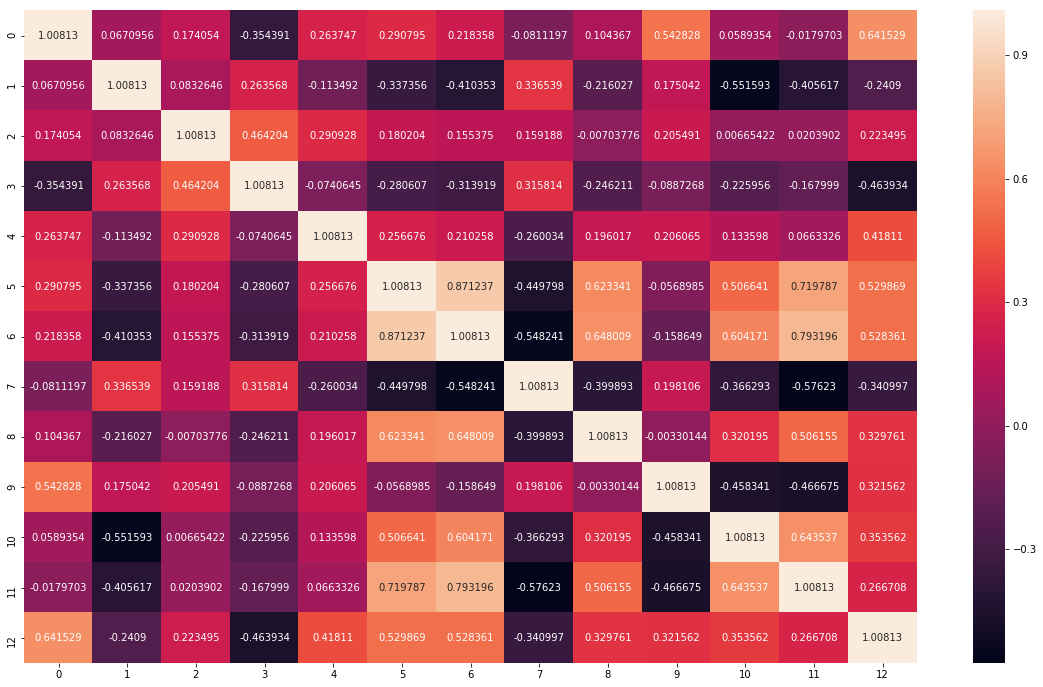

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Covariance Marix
cov_mat = np.cov(X_train_std.T)

## Plot Covariance Matrix
plt.figure(figsize=(20, 12))
sn.heatmap(cov_mat, annot=True, fmt='g')
plt.show()

#### Step 3 -  Decompose the covariance matrix into its eigenvectors and eigenvalues

The eigenvectors of the covariance matrix represent the principal components (the directions of maximum variance), whereas the corresponding eigenvalues will define their magnitude. In the case of the Wine dataset, we would obtain 13 eigenvectors and eigenvalues from the 13 x 13-dimensional covariance matrix.

$
\pmb \Sigma\pmb{v} =  \lambda\pmb{v}\\\\
$

$
\text{where} \\\\
$

$
\pmb \Sigma = Covariance Matrix\\
\pmb{v} = \text{Eigenvector}\\
\lambda = \text{Eigenvalue}
$

In [7]:
## Compute Eigen Values and Eigen Vectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


Using the linalg.eig function, we performed the eigendecomposition, which yielded a vector (eigen_vals) consisting of
13 eigenvalues and the corresponding eigenvectors stored as columns in a 13 x 13-dimensional matrix (eigen_vecs).

#### Step 4 - Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors

In [8]:
## Total of Eigen Values
tot = sum(eigen_vals)

## Variance Explained by each Eigen Val
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

## Cumulative Variance
cum_var_exp = np.cumsum(var_exp)

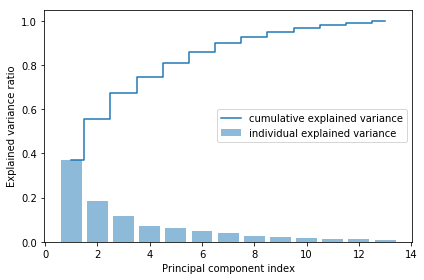

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The above plot indicates that the first principal component alone accounts for approximately 40 percent of the total variance in the dataset. Also, we can see that the first two principal components combined explain almost 60 percent of the variance in the dataset

We will sort the eigenpairs by descending order of the eigenvalues, construct a projection matrix from the selected eigenvectors, and use the projection matrix to transform the data onto the lower-dimensional subspace.

We start by sorting the eigenpairs by decreasing order of the eigenvalues:

In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

#### Step 5 & 6 -  Select k eigenvectors which correspond to the k largest eigenvalues & Construct a projection matrix W from the "top" k eigenvectors

Next, we collect the two eigenvectors that correspond to the two largest eigenvalues, to capture about 60 percent of the variance in this dataset. 

* Note that we only chose two eigenvectors for the purpose of illustration, since we are going to plot the data via a two-dimensional scatter plot later in this subsection. In practice, the number of principal components has to be determined by a trade-off between computational efficiency and the performance of the classifier:

The below code will create a 13 x 2-dimensional projection matrix W from the top two eigenvectors.

In [11]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


#### Step 7 - Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

Using the projection matrix, we can now transform a sample x (represented as a 1 x 13-dimensional row vector) onto the PCA subspace (the principal components one and two) obtaining $x^{1}$, now a two-dimensional sample vector consisting of two new features:


$x^{1} = x.W$

In [12]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

Similarly, we can transform the entire 124 x 13-dimensional training dataset onto the two principal components by calculating the matrix dot product:

In [14]:
X_train_pca = X_train_std.dot(w)
X_train_pca.shape

(124, 2)

### Visualize the data

let us visualize the transformed Wine training set, now stored as an 124 x 2-dimensional matrix, in a two-dimensional scatterplot.

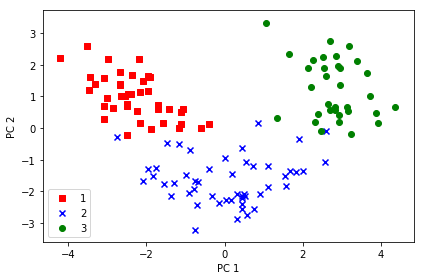

In [15]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

As we can see in the resulting plot, the data is more spread along the x-axis—the first principal component—than the second principal component (y-axis), which is consistent with the explained variance ratio plot that we created in the previous subsection. However, we can intuitively see that a linear classifier will likely be able to separate the classes well.

Although we encoded the class label information for the purpose of illustration in the preceding scatter plot, we have to keep in mind that PCA is an unsupervised technique that doesn't use any class label information.

### Example - 2

Let us now perform PCA using API in Scikit Learn in Python on the Iris data. The data consists of measurements of three different species of irises. namely 

1. Iris Virginica 
2. Iris Setosa 
3. Iris Versicolor

In [16]:
from sklearn.datasets import load_iris 

iris = load_iris() 

#checking to see what datasets are available in iris 
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [17]:
# check the shape of data
print(iris.data.shape)

# check the feature names
print(iris.feature_names)

# check target values 
print(iris.target_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [18]:
# one can directly do PCA on original data
# but we will create a dataframe with the data and then do PCA

import pandas as pd

# making a dataframe from array
iris_dataframe = pd.DataFrame.from_records(iris.data)

# assigning column names to the dataframe
iris_dataframe.columns = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

# add the target variable to the dataframe
iris_dataframe['species'] = iris.target

# print the top 5 rows of dataframe
iris_dataframe.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
# PCA with 2 components.
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

In [20]:
# Fitting PCA to the iris dataset and transforming it into 2 principal components
X, y = iris_dataframe.iloc[:, 0:4].values, iris_dataframe.iloc[:, 4].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

X_proj = pca.fit_transform(X_std)
print(X_proj.shape)

(150, 2)


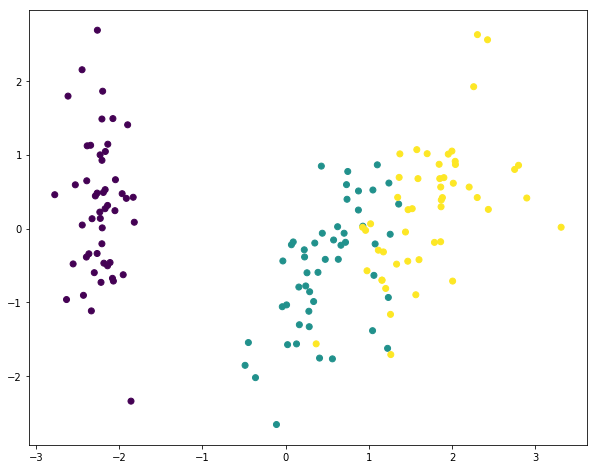

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Plotting the projected principal components and try to understand the data. 
# c=y colors the scatter plot based on y (target)
plt.figure(figsize = (10,8))
plt.scatter(X_proj[:,0], X_proj[:,1], c=y)
plt.show()

### Look into details of PCA object

we will look into two important elements of PCA objects

1. pca.components_

pca.components_ has the meaning of each principal component, essentially how it was derived. Checking shape tells us it has 2 rows, one for each principal component and 4 columns, proportion of each of the 4 features for each row

2. pca.explained_variance_ratio

this tells us the extent to which each component explains the original dataset. The 1st component is able to explain ~72% of X and the second only about 23%. Together they can explain about 95% of the variance of X

In [22]:
print(pca.components_)
print(pca.components_.shape)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
(2, 4)


In [23]:
# Trying to decipher the meaning of the principal components
print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.2f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names)))

Meaning of the 2 components:
0.52 x sepal length (cm) + -0.27 x sepal width (cm) + 0.58 x petal length (cm) + 0.56 x petal width (cm)
0.38 x sepal length (cm) + 0.92 x sepal width (cm) + 0.02 x petal length (cm) + 0.07 x petal width (cm)


In [24]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [25]:
# So if we only needed a 92% variance, we actually need just one component, let's verify
pca = PCA(0.92)
X_new = pca.fit_transform(X)
print(X_new.shape)

# If we need more than 98% variance, we begin to need more components
pca=PCA(0.98)
X_new = pca.fit_transform(X)
print(X_new.shape)

(150, 1)
(150, 3)


### Example - 3

We will slightly increase the complexity and look into a larger dataset which is also available in scikit-learn package. This is the dataset of handwritten digits. Let us look into dataset

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [27]:
# Print the shape of data
print(digits.data.shape) 

# Print the shape of images
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


Looking at data, there are 64 features, and in another available dataset called images there are 8X8 pixels. So, the features are nothing but a reshape of the images data 8X8 pixels thrown next to each other describing the intensity of each pixel. The imput is a set of images of digits from which we need to learn the target, which is the actual digit itself.

In [28]:
# Run PCA retaining 95% of the variance
X, y = digits.data, digits.target
pca_digits = PCA(0.95)
X_proj = pca_digits.fit_transform(X)
print(X.shape, X_proj.shape)

(1797, 64) (1797, 29)


Above tells us that we need 29 principal components to explain 95% of the original dataset which consists of 64 features

In [29]:
# Let's run PCA with 2 components so as to plot the data in 2D
pca_digits = PCA(2)
X_proj = pca_digits.fit_transform(X)
print(np.sum(pca_digits.explained_variance_ratio_))

0.28509364823683936


As you can see above we only retain about 28% of the variance by choosing 2 components

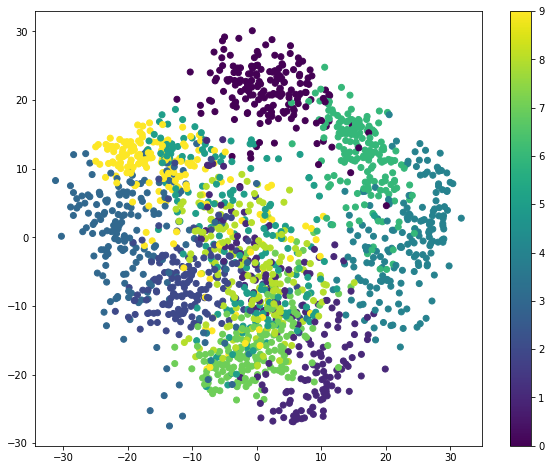

In [30]:
#Let's plot the principal components as a scatter plot
plt.figure(figsize = (10,8))
plt.scatter(X_proj[:,0], X_proj[:,1], c=y)
plt.colorbar()
plt.show()

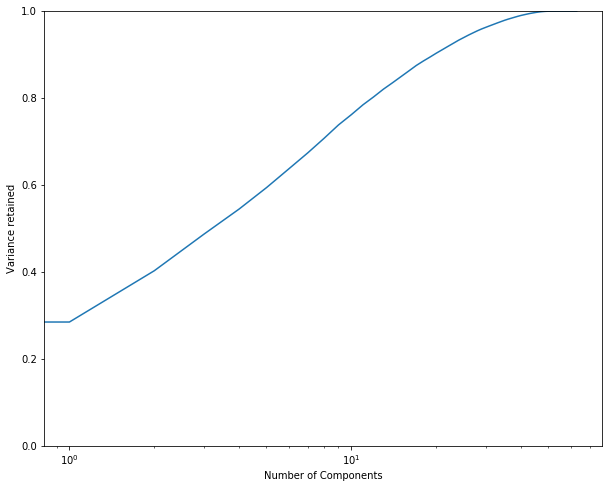

In [31]:
#Lets try and plot number of components versus explained variance ratio as a cumulative sum
pca_digits = PCA(64).fit(X)
plt.figure(figsize = (10,8))
plt.semilogx(np.cumsum(pca_digits.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance retained')
plt.ylim(0,1)
plt.show()

### Example - 4

Let's try and compress a facial image dataset using PCA. Going to use the Olivetti face image dataset, again available in scikit-learn. Would like to reduce the original dataset using PCA, essentially compressing the images and see how the compressed images turn out by visualizing them.

Before using PCA, let us try and understand as well as display the original images. Note the Olivetti faces data is available in scikit-learn but not locally. It needs to be downloaded.

In [32]:
from sklearn.datasets import fetch_olivetti_faces
oliv = fetch_olivetti_faces()
print(oliv.keys())
print(oliv.data.shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096)


There are 400 images with 64X64 (4096) pixels each.

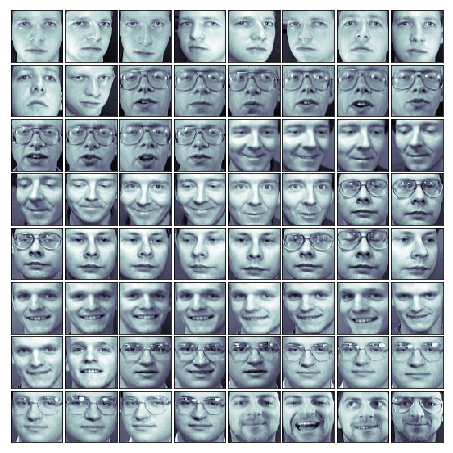

In [33]:
#Setup a figure 6 inches by 6 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest')
    
plt.show()

In [34]:
#Let's see how much of the variance is retained if we compressed these down to a 8x8 (64) pixel images.
X, y = oliv.data, oliv.target
pca_oliv = PCA(64)
X_proj = pca_oliv.fit_transform(X)
print(X_proj.shape)

(400, 64)


In [35]:
print(np.cumsum(pca_oliv.explained_variance_ratio_))

[0.23812734 0.37806708 0.4577532  0.5077365  0.5438349  0.5754043
 0.5996726  0.6200366  0.63961774 0.65633893 0.67229116 0.68666095
 0.6991284  0.7105997  0.7212285  0.73100567 0.7401963  0.748352
 0.7558907  0.76336056 0.77034634 0.7764926  0.7823319  0.7880291
 0.793491   0.7988095  0.8039477  0.8089061  0.8134827  0.8178945
 0.8219145  0.8257562  0.8293756  0.832721   0.83592457 0.83908474
 0.8421359  0.84512186 0.8479424  0.8506805  0.85327727 0.8558155
 0.8582591  0.8606562  0.86295724 0.86521894 0.8674386  0.8696324
 0.87171626 0.8737608  0.87572646 0.87763155 0.8794692  0.8812407
 0.8830066  0.8847089  0.8863417  0.8879604  0.88955176 0.89110684
 0.89261067 0.89409345 0.8955654  0.89701694]


Above is not bad at all. It says that we are able to retain 89.7% of variance by reducing number of features down by 64 times.

Let's now try to reconstruct the images using the new reduced dataset. In other words, we transformed the 64x64 pixel images into 8x8 images. Now to visualize how these images look we need to inverse transform the 8x8 images back to 64x64 dimension. 

Note that we're not reverting back to the original data, we're simply going back to the actual dimension of the original images so we can visualize them.

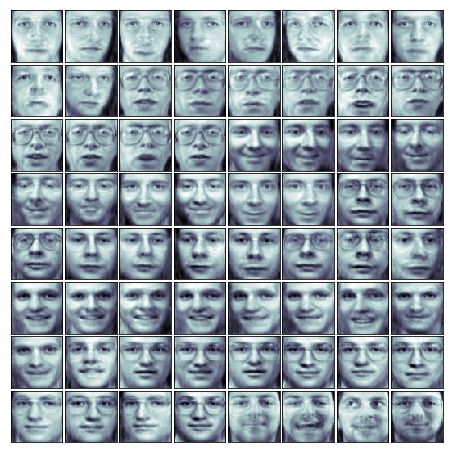

In [36]:
X_inv_proj = pca_oliv.inverse_transform(X_proj)

#reshaping as 400 images of 64x64 dimension
X_proj_img = np.reshape(X_inv_proj,(400,64,64))

#Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 dimension but 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')
    
plt.show()

As you can see the images look comparable to original ones but few details are missing. However the advantage we gained in this is to reduce the dimensionality by 64 times which helps significantly in our analysis.

### Tip:

When performing PCA, it is typically a good idea to normalize the data first. Because PCA seeks to identify the principal components with the highest variance, if the data are not properly normalized, attributes with large values and large variances (in absolute terms) will end up dominating the first principal component when they should not. Normalizing the data gets each attribute onto more or less the same scale, so that each attribute has an opportunity to contribute to the principal component analysis.